Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Loading dataset

In [6]:
data = pd.read_csv('/Users/apple/Desktop/CS/Machine Learning/Projects/Students Performance .csv')

Display the first few rows rows of the dataset

In [7]:
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
  Student_ID Student_Age     Sex High_School_Type Scholarship Additional_Work  \
0   STUDENT1       19-22    Male            Other         50%             Yes   
1   STUDENT2       19-22    Male            Other         50%             Yes   
2   STUDENT3       19-22    Male            State         50%              No   
3   STUDENT4          18  Female          Private         50%             Yes   
4   STUDENT5       19-22    Male          Private         50%              No   

  Sports_activity Transportation  Weekly_Study_Hours Attendance Reading Notes  \
0              No        Private                   0     Always     Yes   Yes   
1              No        Private                   0     Always     Yes    No   
2              No        Private                   2      Never      No    No   
3              No            Bus                   2     Always      No   Yes   
4              No            Bus                  12     Always     Yes    N

Basic information about the dataset

In [8]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_ID          145 non-null    object
 1   Student_Age         145 non-null    object
 2   Sex                 145 non-null    object
 3   High_School_Type    145 non-null    object
 4   Scholarship         144 non-null    object
 5   Additional_Work     145 non-null    object
 6   Sports_activity     145 non-null    object
 7   Transportation      145 non-null    object
 8   Weekly_Study_Hours  145 non-null    int64 
 9   Attendance          145 non-null    object
 10  Reading             145 non-null    object
 11  Notes               145 non-null    object
 12  Listening_in_Class  145 non-null    object
 13  Project_work        145 non-null    object
 14  Grade               145 non-null    object
dtypes: int64(1), object(14)
memory usage: 17.1+ KB


Checking for missing values

In [9]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Student_ID            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64


Checking the columns name in the dataset

In [10]:
print("\nColumn Names in the Dataset:")
print(data.columns)


Column Names in the Dataset:
Index(['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship',
       'Additional_Work', 'Sports_activity', 'Transportation',
       'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
       'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')


Exploratory data analysis &
Plotting the distributions of grades

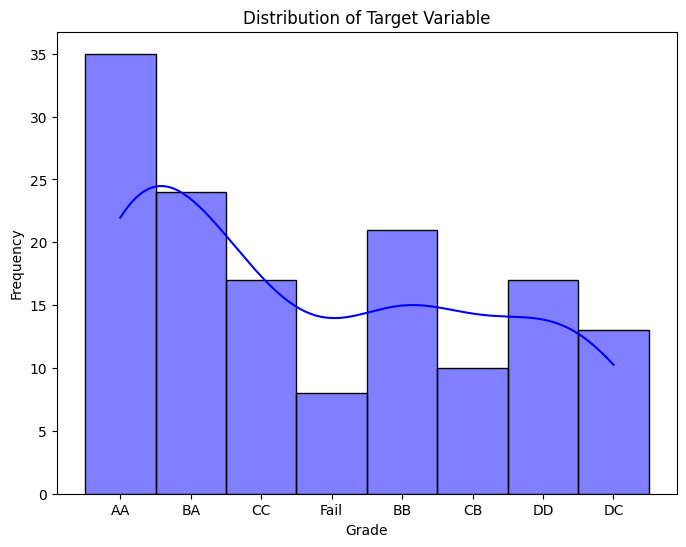

In [11]:
target_column = 'Grade'
plt.figure(figsize=(8, 6))
sns.histplot(data[target_column], kde=True, color='blue')
plt.title('Distribution of Target Variable')
plt.xlabel(target_column)
plt.ylabel('Frequency')
plt.show()

Correlation heatmap

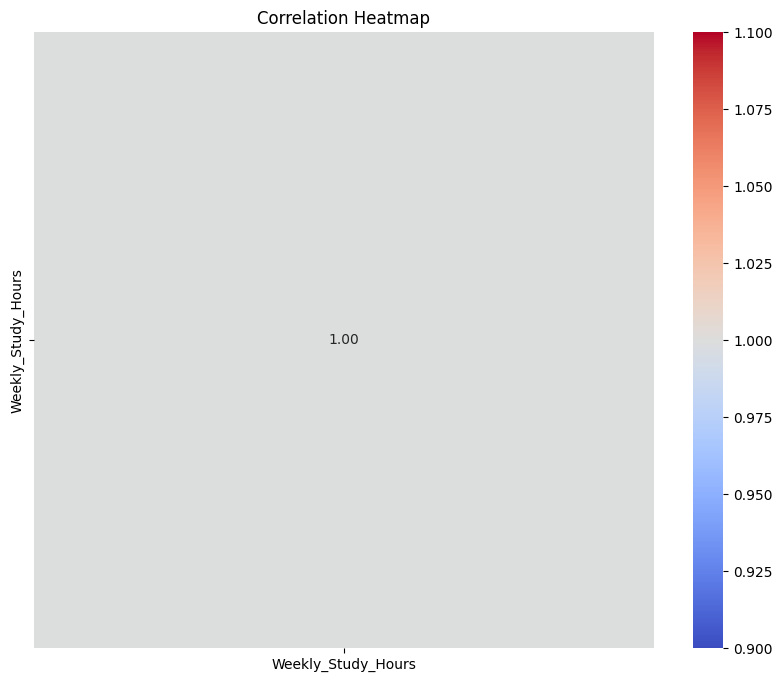

In [12]:
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_data.corr()  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

Splitting the data into features X and Y

In [14]:
X = data.drop(columns=[target_column])  # Using the identified target column
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature scaling

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training

In [16]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Model prediction and score evaluation

In [17]:
y_pred = model.predict(X_test)
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Model Evaluation:
Mean Squared Error (MSE): 4.99
R-squared (R2): 0.01


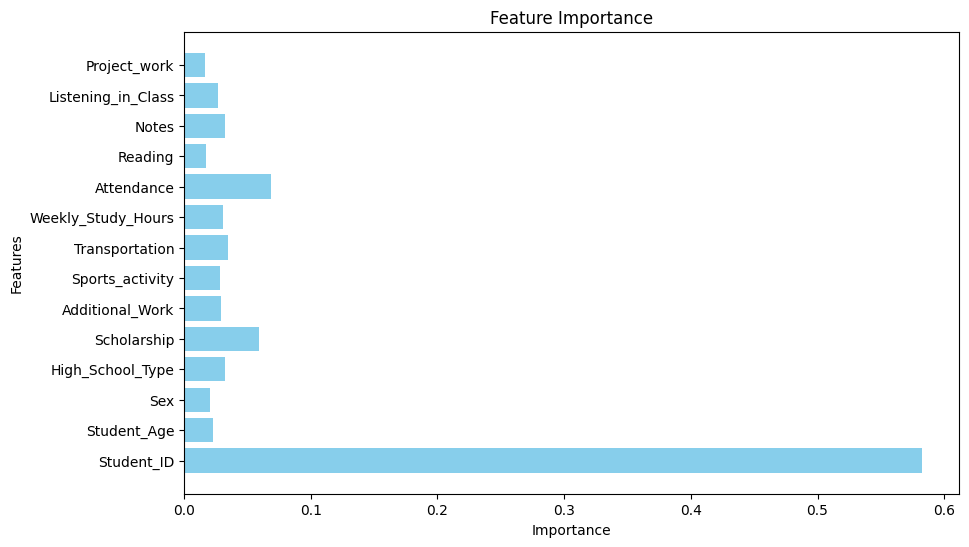

In [18]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()